In [1]:
from dataset import Dataset
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import cv2
from collections import Counter
%matplotlib inline

In [2]:
dataset = Dataset("data/BaselineOuterInner", batch_size=20)

In [3]:
trainX = dataset.train_data
trainY = dataset.train_labels


tx = dataset.test_data
ty = dataset.test_labels

#Flatten data for test images as a vector and labels as numbers
flattenDataset =np.nan_to_num( np.array([image.flatten() for image in trainX]))
flatTest =np.nan_to_num( np.array([image.flatten() for image in tx]))
fTrainLabels = np.where(trainY == 1)[1]
fTestLabels = np.where(ty == 1)[1]

Distribution class for train  Counter({2: 2634, 1: 1677, 0: 985})
Pca with 2 components explained variance [ 0.19669254  0.01769082]
PCA 2 comp of the data (using train)
Distribution class for test    Counter({2: 1622, 1: 1018, 0: 603})
Pca with 5 components explained variance [ 0.19669254  0.01769082]
PCA 2 comp of the data (using test)


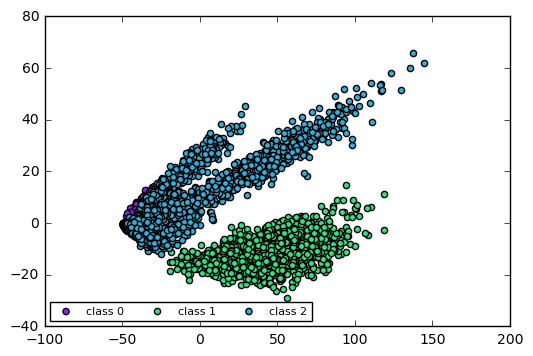

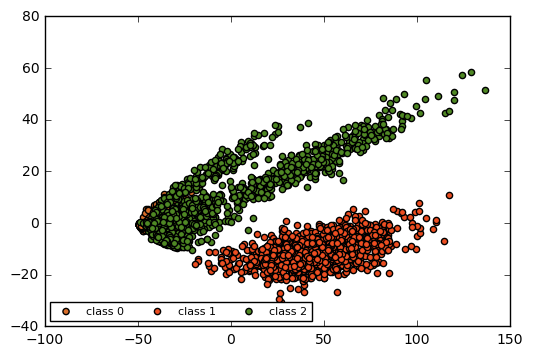

In [4]:
import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components=2)




#Show a few statistics of the data
print "Distribution class for train ",Counter(fTrainLabels)
pca.fit(flattenDataset)
print  "Pca with 2 components explained variance "+str(pca.explained_variance_ratio_) 
print "PCA 2 comp of the data (using train)"

#SHOW PCA FOR TRAIN VAL DATA
transformed = pca.transform(flattenDataset)
labels = fTrainLabels

plt.figure()
allscatter=[]
for c in range(dataset.getNclasses()):
    elements = np.where(labels == c)
    temp=plt.scatter(transformed[elements, 0], transformed[elements, 1],
           facecolors='none', label='Class '+str(c), c=np.random.rand(3,1))
    allscatter.append(temp)
plt.legend(tuple(allscatter),
       tuple(["class "+str(c) for c in range(dataset.getNclasses())]),
       scatterpoints=1,
       loc='lower left',
       ncol=3,
       fontsize=8)

    
#SHOW PCA FOR TEST DATA

print "Distribution class for test   ",Counter(fTestLabels)
print  "Pca with 5 components explained variance "+str(pca.explained_variance_ratio_) 
print "PCA 2 comp of the data (using test)"

transformed = pca.transform(flatTest)
labels = fTestLabels

plt.figure()
allscatter=[]
for c in range(dataset.getNclasses()):
    elements = np.where(labels == c)
    temp=plt.scatter(transformed[elements, 0], transformed[elements, 1],
           facecolors='none', label='Class '+str(c), c=np.random.rand(3,1))
    allscatter.append(temp)
plt.legend(tuple(allscatter),
       tuple(["class "+str(c) for c in range(dataset.getNclasses())]),
       scatterpoints=1,
       loc='lower left',
       ncol=3,
       fontsize=8)




In [ ]:
index = 2
plt.imshow(tx[index])
print ty[index]

In [ ]:
#The mean image is the mean of all original images in the dataset
#As part of the preprocessing all images are normalized (substract mean and div for standar deviation) 
#For an image this means to substract pixelwise with the mean image and div pixelwise with the std image

#This meanNorm is not the mean image (the mean image is database.mean) this meanNorm is the mean of the images
#already normalized so it has units of std (standar deviaton).

meanNorm = np.mean(trainX,axis=0)
for row in meanNorm:
    print row

In [ ]:
plt.imshow(meanNorm)

In [ ]:
#As a test i try to clasify the data using a SVM (support vector machine) of the sklearn package 

# from sklearn.svm import SVC
# from sklearn.metrics import classification_report
# clf = SVC()


# clf.fit(flattenDataset, fTrainLabels) 
# pred = clf.predict(flatTest)
# print classification_report(fTestLabels, pred)